In [37]:
!pip install contractions
!pip install inflect
!pip install pandas-profiling==2.7.1

In [38]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet_ic')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet_ic to
[nltk_data]     C:\Users\juana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\juana\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

In [58]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('datos25k.csv', sep=',', index_col=0)
data_t = data
data_t

text        class  \
Unnamed: 0                                                                   
173271      i want to destroy myselffor once everything wa...      suicide   
336321      I kind of got behind schedule with learning fo...  non-suicide   
256637      I am just not sure anymoreFirst and foremost: ...      suicide   
303772      please give me a reason to liveThats too much ...      suicide   
293747      27f struggling to find meaning moving forwardI...      suicide   
...                                                       ...          ...   
6163        Everything is too hardI feel so overwhelemd by...      suicide   
217588      American football sucks It looks like a mistra...  non-suicide   
319299      What is one of the best dreams you have had? I...  non-suicide   
32869       I did not asked to be here\nObviously, nobody ...      suicide   
169948      I seriously do not want to be aliveSo many tho...      suicide   

                                                        words  
Unnamed: 0                                                     
173271      destroy myselff start feel tumbl cop reason te...  
336321      kind schedule learn week testweek test study s...  
256637      anymorefirst foremost brazil judg doct form de...  
303772      giv reason liveth reason liv anym feel infery ...  
293747      27f struggling find mean mov forward admit bit...  
...                                                       ...  
6163        hard feel overwhelemd feel singl day handl han...  
217588      am footbal suck mistransl rugby fuck cal footb...  
319299      dream week ago liv cabin onlin friend snow sta...  
32869       ask ask born world fourteen year simply put ob...  
169948      aliveso thought head handl distract thing feel...  

[25000 rows x 3 columns]

In [59]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if not word in stopwords.words():
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [72]:
X_data, y_data = data_t['words'].fillna(' '),data_t['class']
y_data = (y_data == 'suicide').astype('int64')

y_data

Unnamed: 0
173271    1
336321    0
256637    1
303772    1
293747    1
         ..
6163      1
217588    0
319299    0
32869     1
169948    1
Name: class, Length: 25000, dtype: int64

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X_data)

vectors

<25000x31750 sparse matrix of type '<class 'numpy.float64'>'
	with 742338 stored elements in Compressed Sparse Row format>

In [74]:
tf_idf = pd.DataFrame(vectors.todense()).iloc[:5]  
tf_idf.columns = vectorizer.get_feature_names_out()
tfidf_matrix = tf_idf.T
tfidf_matrix.columns = ['response'+ str(i) for i in range(1, 6)]
tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)

# Top 10 words 
tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:25] 

# Print the first 10 words 
print(tfidf_matrix.head(25))

              response1  response2  response3  response4  response5     count
study          0.000000   0.424733   0.116512   0.000000   0.000000  0.541245
feel           0.090053   0.000000   0.106000   0.161130   0.131111  0.488295
testweek       0.000000   0.450158   0.000000   0.000000   0.000000  0.450158
dream          0.000000   0.000000   0.111374   0.000000   0.330619  0.441993
hard           0.000000   0.153792   0.084376   0.000000   0.166983  0.405151
reason         0.139710   0.000000   0.000000   0.249980   0.000000  0.389689
start          0.126311   0.000000   0.148679   0.000000   0.110340  0.385330
myselff        0.382782   0.000000   0.000000   0.000000   0.000000  0.382782
infery         0.000000   0.000000   0.000000   0.369067   0.000000  0.369067
tumbl          0.351070   0.000000   0.000000   0.000000   0.000000  0.351070
cop            0.202340   0.000000   0.119086   0.000000   0.000000  0.321426
shred          0.319692   0.000000   0.000000   0.000000   0.000

In [75]:
data_t.to_csv("datos.csv", sep=',', encoding = 'utf-8')

In [76]:
copia=vectors
copia=pd.DataFrame.sparse.from_spmatrix(copia)
copia.head(7)
#copia.to_csv("/Users/Santiago_Talero/Desktop/Proyecto Etapa 1/vectores.csv", sep=',', encoding = 'utf-8')

0      1      2      3      4      5      6      7      8      9      ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
6    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   31740  31741  31742  31743  31744  31745  31746  31747  31748  31749  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
6    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[7 rows x 31750 columns]

In [78]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(copia, y_data, test_size=0.3, random_state=0)

Minimum error:- 0.4301333333333333 at K = 1


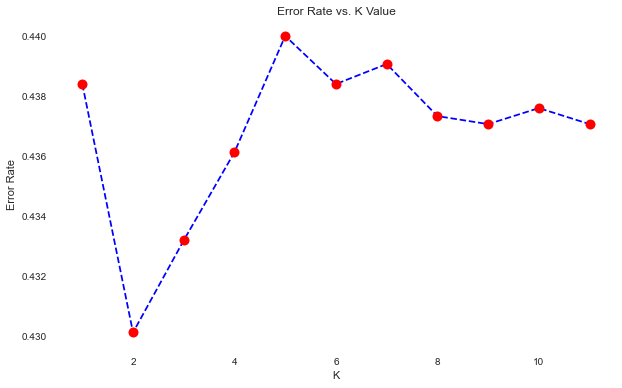

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

error_rate = []
for i in range(1,12):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,12),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [96]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [97]:
confusion_matrix(Y_test, y_pred)

array([[1000, 3205],
       [  83, 3212]], dtype=int64)

C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


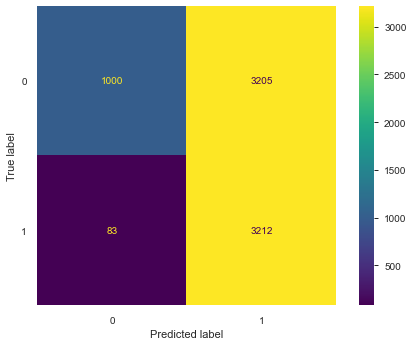

In [98]:
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [99]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.56
Recall: 0.9748103186646434
Precisión: 0.5005454262116253
Puntuación F1: 0.6614497528830313


In [100]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [101]:
confusion_matrix(Y_test, y_pred)

array([[4173,   32],
       [3194,  101]], dtype=int64)

C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


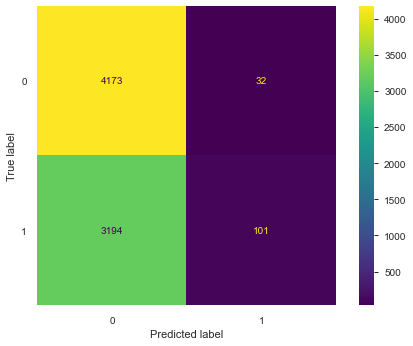

In [102]:
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [103]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.57
Recall: 0.030652503793626707
Precisión: 0.7593984962406015
Puntuación F1: 0.05892648774795799


In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [105]:
confusion_matrix(Y_test, y_pred)

array([[4142,   63],
       [3186,  109]], dtype=int64)

C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


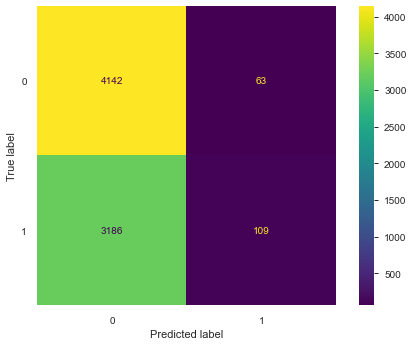

In [106]:
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [107]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.57
Recall: 0.0330804248861912
Precisión: 0.6337209302325582
Puntuación F1: 0.06287856936832997


In [129]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train,Y_train);

In [137]:
y_pred = rf.predict(X_test)

In [138]:
confusion_matrix(Y_test, y_pred)

array([[3880,  325],
       [ 443, 2852]], dtype=int64)

C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


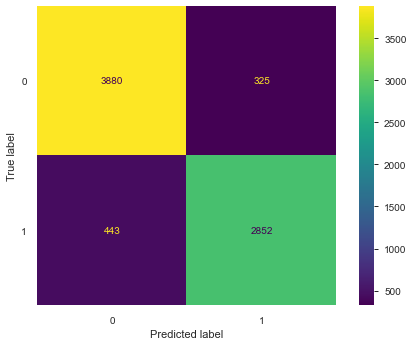

In [139]:
plot_confusion_matrix(rf, X_test, Y_test)  
plt.show()

In [140]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.90
Recall: 0.8655538694992413
Precisión: 0.8977022348127164
Puntuación F1: 0.8813349814585909
